## Load images and dataaset

In [ ]:
from google.colab import drive, files
import zipfile
import os

In [ ]:
# Upload the file
uploaded = files.upload()

Saving Training Metadata.csv to Training Metadata.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
zipTrain = zipfile.ZipFile('/content/drive/MyDrive/Skincancer/Train/ISIC-images.zip', 'r')

#basePath =  '/content/drive/MyDrive/Skincancer/'


In [ ]:
zipTrain.extractall('images/Train')

In [ ]:
print("length: ", len(os.listdir('images/Train')))

length:  10018


## EDA

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
skin_df = pd.read_csv('skin_train.csv') # load in the data
skin_df.head()


,isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,image_type,lesion_id,melanocytic,sex
0,ISIC_0024306,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,45.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_7252831,True,male
1,ISIC_0024307,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,50.0,lower extremity,benign,nevus,serial imaging showing no change,dermoscopic,IL_6125741,True,male
2,ISIC_0024308,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,55.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_3692653,True,female
3,ISIC_0024309,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,40.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_0959663,True,male
4,ISIC_0024310,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,60.0,anterior torso,malignant,melanoma,histopathology,dermoscopic,IL_8194852,True,male


### Checking for unique value counts

In [ ]:
# count of unique values in each feature of the dataset
skin_df.nunique()

isic_id                   10015
attribution                   1
copyright_license             1
age_approx                   17
anatom_site_general           6
benign_malignant              2
diagnosis                     8
diagnosis_confirm_type        4
image_type                    1
lesion_id                  7470
melanocytic                   2
sex                           2
dtype: int64

In [ ]:
skin_df['age_approx'].value_counts()

45.0    1299
50.0    1189
55.0    1009
40.0     987
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       84
15.0      77
10.0      41
Name: age_approx, dtype: int64

In [ ]:
skin_df['anatom_site_general'].value_counts()

lower extremity    2396
posterior torso    2192
anterior torso     1429
upper extremity    1208
head/neck          1097
palms/soles           7
Name: anatom_site_general, dtype: int64

In [ ]:
skin_df['diagnosis'].value_counts()

nevus                         6705
melanoma                      1113
pigmented benign keratosis    1099
basal cell carcinoma           514
squamous cell carcinoma        197
vascular lesion                142
actinic keratosis              130
dermatofibroma                 115
Name: diagnosis, dtype: int64

In [ ]:
skin_df['diagnosis_confirm_type'].value_counts()

histopathology                                   5340
serial imaging showing no change                 3704
single image expert consensus                     902
confocal microscopy with consensus dermoscopy      69
Name: diagnosis_confirm_type, dtype: int64

In [ ]:
skin_df['benign_malignant'].value_counts()

benign       6705
malignant    1113
Name: benign_malignant, dtype: int64

The 'benign_malignant' feature indicates whether it is skincancer or not.

In [ ]:
skin_df['melanocytic'].value_counts()

True     7818
False    2197
Name: melanocytic, dtype: int64

### Checking missing values

In [ ]:
missing_values_count = skin_df.isnull().sum()
print(missing_values_count)


isic_id                      0
attribution                  0
copyright_license            0
age_approx                  94
anatom_site_general       1686
benign_malignant          2197
diagnosis                    0
diagnosis_confirm_type       0
image_type                   0
lesion_id                    0
melanocytic                  0
sex                         47
dtype: int64


In [ ]:
# Calculate the percentage of missing values for each feature
missing_percentage = (skin_df.isnull().sum() / len(skin_df)) * 100

# Print or display the percentage of missing values for each feature
print(missing_percentage)


isic_id                    0.000000
attribution                0.000000
copyright_license          0.000000
age_approx                 0.938592
anatom_site_general       16.834748
benign_malignant          21.937094
diagnosis                  0.000000
diagnosis_confirm_type     0.000000
image_type                 0.000000
lesion_id                  0.000000
melanocytic                0.000000
sex                        0.469296
dtype: float64


Substiuting missing age with the mean

In [ ]:
skin_df['age_approx'].fillna((skin_df['age_approx'].mean()), inplace=True)

### Encoding

Encoding the diagnosis

In [ ]:
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['diagnosis'])
LabelEncoder()
print(list(le.classes_))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
skin_df['label'] = le.transform(skin_df["diagnosis"])

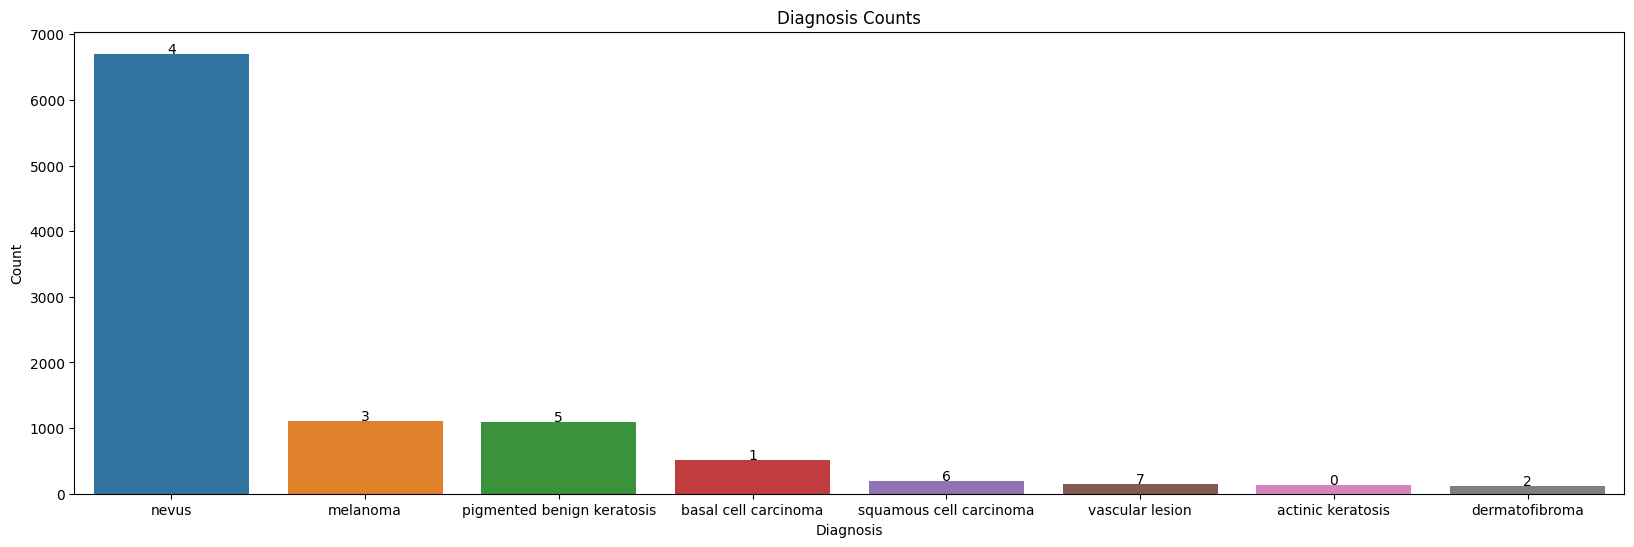

In [ ]:

# Plotting
plt.figure(figsize=(20, 6))
sns.countplot(x='diagnosis', data=skin_df, order=skin_df['diagnosis'].value_counts().index)
plt.title('Diagnosis Counts')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

for i, count in enumerate(skin_df['diagnosis'].value_counts()):
    plt.text(i, count + 10, f"{le.transform([skin_df['diagnosis'].value_counts().index[i]])[0]}", ha='center')

plt.show()

Find which diagnosis is benign and which is malignant.

In [ ]:
basal = skin_df[skin_df['diagnosis'] == 'basal cell carcinoma']
harmful = basal['benign_malignant'] == 'malignant'
harmful.value_counts()

False    514
Name: benign_malignant, dtype: int64

In [ ]:
squamous = skin_df[skin_df['diagnosis'] == 'squamous cell carcinoma']
harmful = squamous['benign_malignant'] == 'malignant'
harmful.value_counts()

False    197
Name: benign_malignant, dtype: int64

In [ ]:
nevus = skin_df[skin_df['diagnosis'] == 'nevus']
harmful = nevus['benign_malignant'] == 'malignant'
harmful.value_counts()

False    6705
Name: benign_malignant, dtype: int64

Since we can compare the total false value with the unique value counts therefore these are benign except for 'basal cell carcinoma'

To be able to conclude which diagnosis of cancer is indisputably benign and which one is malignant. From the research paper, we are able to conclude following:

In [ ]:
lesion_danger = {
    'nevus': 0, # 0 for benign
    'melanoma': 1, # 1 for malignant
    'pigmented benign keratosis': 0, # 0 for benign
    'basal cell carcinoma': 1, # 1 for malignant
    'actinic keratosis': 1, # 1 for malignant
    'vascular lesion': 0,
    'dermatofibroma': 0,
    'squamous cell carcinoma': 0
}

In [ ]:
skin_df["malignant"] = skin_df["diagnosis"].map(lesion_danger.get)

In [ ]:
skin_df.head()

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,image_type,lesion_id,melanocytic,sex,label,malignant
0,ISIC_0024306,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,45.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_7252831,True,male,4,0
1,ISIC_0024307,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,50.0,lower extremity,benign,nevus,serial imaging showing no change,dermoscopic,IL_6125741,True,male,4,0
2,ISIC_0024308,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,55.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_3692653,True,female,4,0
3,ISIC_0024309,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,40.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_0959663,True,male,4,0
4,ISIC_0024310,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,60.0,anterior torso,malignant,melanoma,histopathology,dermoscopic,IL_8194852,True,male,3,1


Since diagonis are all available therefore we can fix missing value of benign_malignant with the skin_df["malignant"]. We are using interplotation technique since skin_df['diagnosis'] identfies if the cell is cancerous or not.

In [ ]:
#since diagonis are all available therefore we can fix missing value of benign_malignant with the skin_df["malignant"]
skin_df['benign_malignant'] = skin_df.apply(lambda row: 'malignant' if row['malignant'] == 1 else 'benign' , axis=1)

### Plotting and comparing the values of skin_df['benign_malignant'] and skin_df['malignant']

In [ ]:
import plotly.express as px

# Assuming skin_df is your DataFrame
fig = px.bar(skin_df["malignant"].value_counts().reset_index(), x='index', y='malignant', labels={'index': 'Class', 'malignant': 'Count'}, title='Benign vs Malignant')

# Show the interactive plot
fig.show()


In [ ]:
skin_df['benign_malignant'].value_counts()

benign       8258
malignant    1757
Name: benign_malignant, dtype: int64

In [ ]:
skin_df['malignant'].value_counts()

0    8258
1    1757
Name: malignant, dtype: int64

### Distribution of lesion type in the dataset

In [ ]:

# Create an interactive bar plot using Plotly Express
fig = px.bar(skin_df["diagnosis"].value_counts().reset_index(), x='index', y='diagnosis', labels={'index': 'Diagnosis', 'diagnosis': 'Count'}, title='Counts for each type of lesions')

# Show the interactive plot
fig.show()

### Checking where the lesions are located on human body

In [ ]:
# Create an interactive bar plot using Plotly Express
fig = px.bar(skin_df["anatom_site_general"].value_counts().reset_index(), x='index', y='anatom_site_general', labels={'index': 'Anatomical Site', 'anatom_site_general': 'Count'}, title='Location of Lesions')

# Show the interactive plot
fig.show()

### Distribution of the validation after diagnosis

<Axes: title={'center': 'Validation received'}>

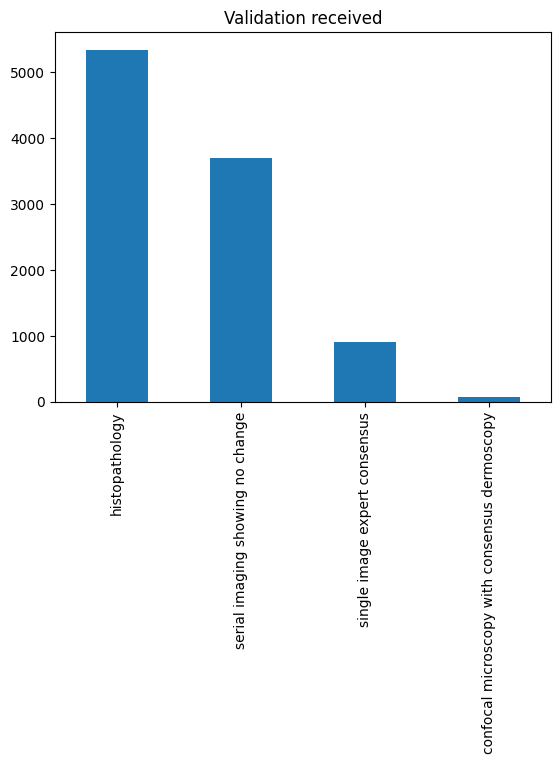

In [ ]:
skin_df["diagnosis_confirm_type"].value_counts().plot(kind='bar', title="Validation received")

### Find out age distribution in the dataset

In [ ]:
# Create an interactive histogram using Plotly Express
fig = px.histogram(skin_df, x='age_approx', nbins=50, title='Age Distribution')

# Show the interactive plot
fig.show()

### Finding out the distribution of malignant cancer in different age groups

In [ ]:
# Create an interactive histogram for malignant cases using Plotly Express
fig = px.histogram(skin_df[skin_df["malignant"] == 1], x='age_approx', nbins=40, title='Age Distribution for Malignant Cases')

# Show the interactive plot
fig.show()

### Distribution of dataset according to gender

<Axes: title={'center': 'Male vs Female'}>

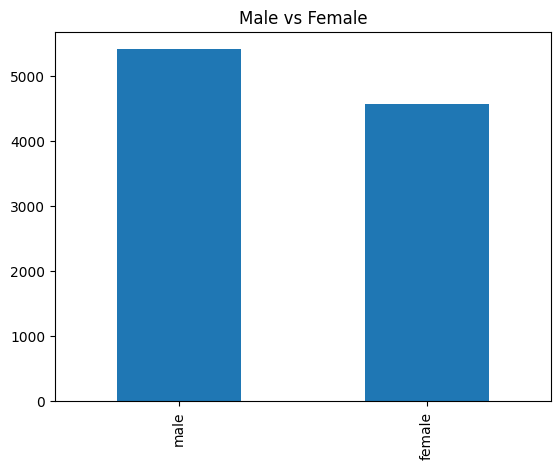

In [ ]:
skin_df["sex"].value_counts().plot(kind="bar", title="Male vs Female")

We have more male patients than female patients in both general population and in malignant case. So far we haven't looked at our image yet. So let's now change our focus into how lesions in our dataset look like.

We can see that most of patients are above 30. But for the malignant cases, most patients are 50 and above, and 70s - year - old patients are the most present.

### Check for other features against target variable

In [ ]:
# Numerical Features
numerical_columns = ['age_approx']

# Categorical Features
categorical_columns = [ 'anatom_site_general', 'benign_malignant', 'diagnosis_confirm_type', 'sex']


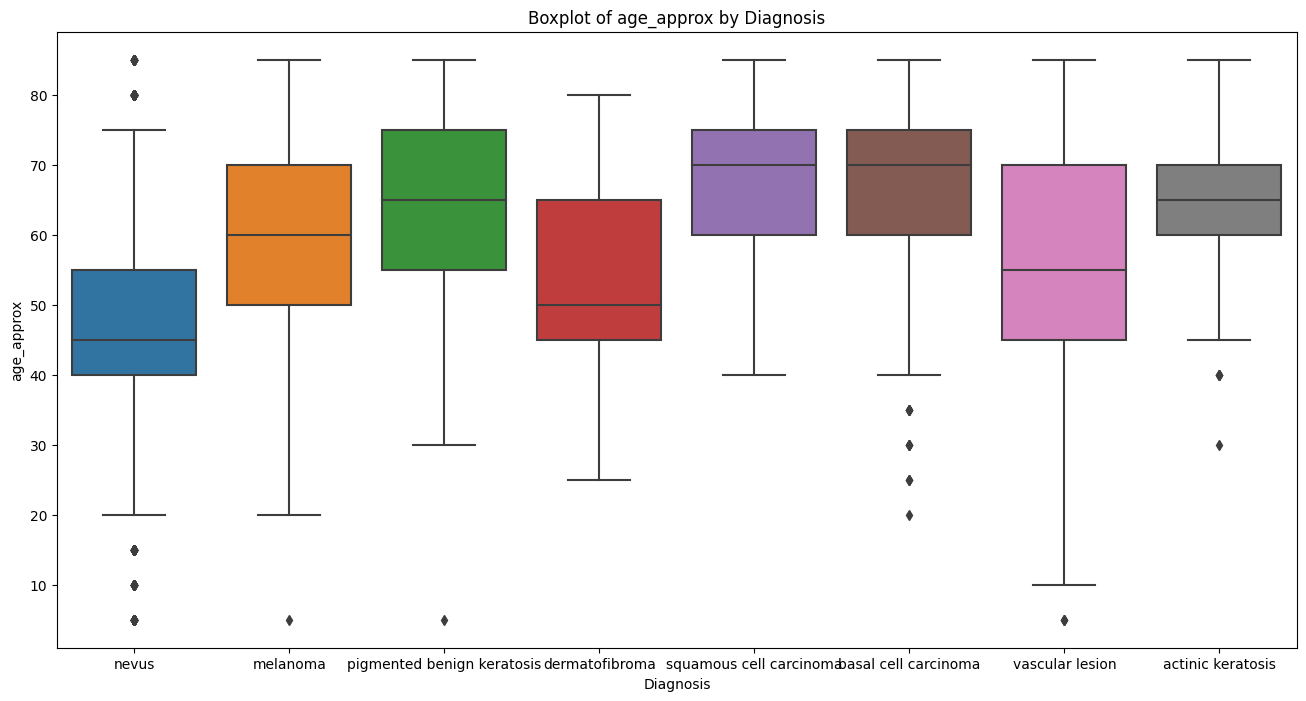

In [ ]:
# Loop through numerical columns
for num_col in numerical_columns:
    # Boxplot for Numerical Features across Diagnosis
    plt.figure(figsize=(16, 8))
    sns.boxplot(x='diagnosis', y=num_col, data=skin_df)
    plt.title(f'Boxplot of {num_col} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(num_col)
    plt.show()


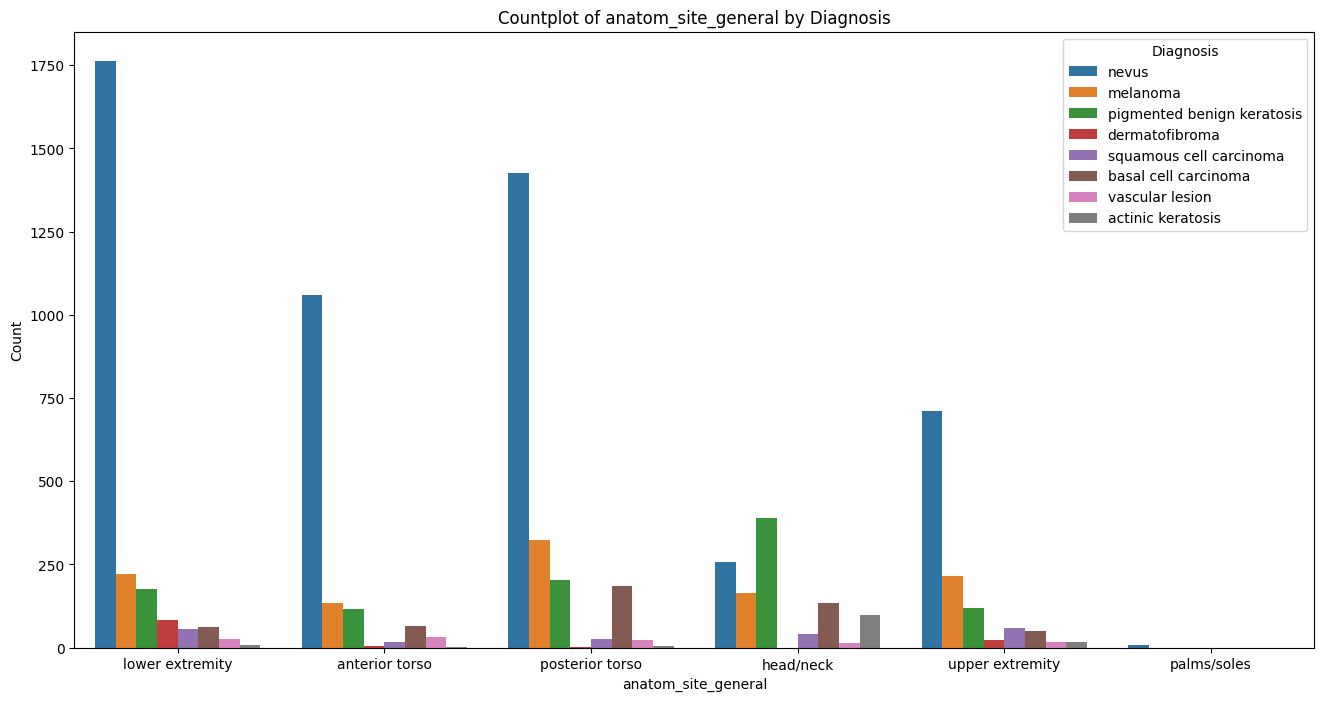

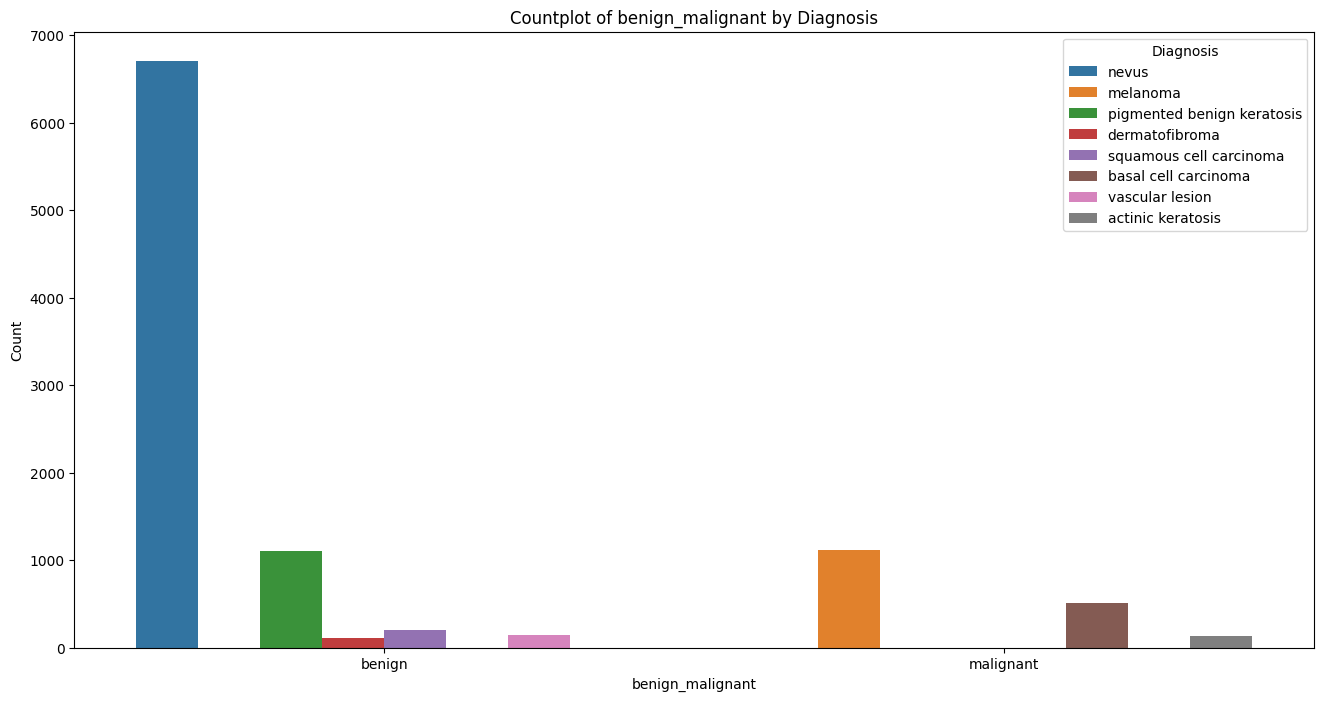

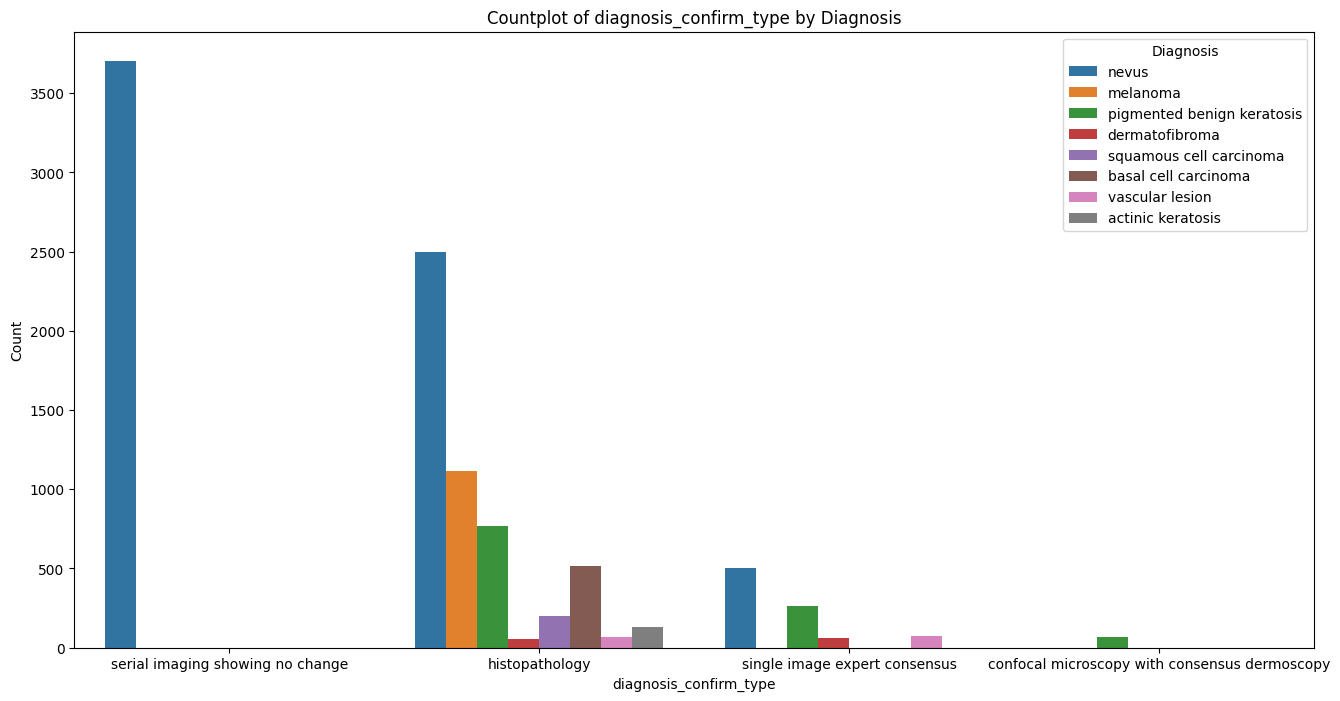

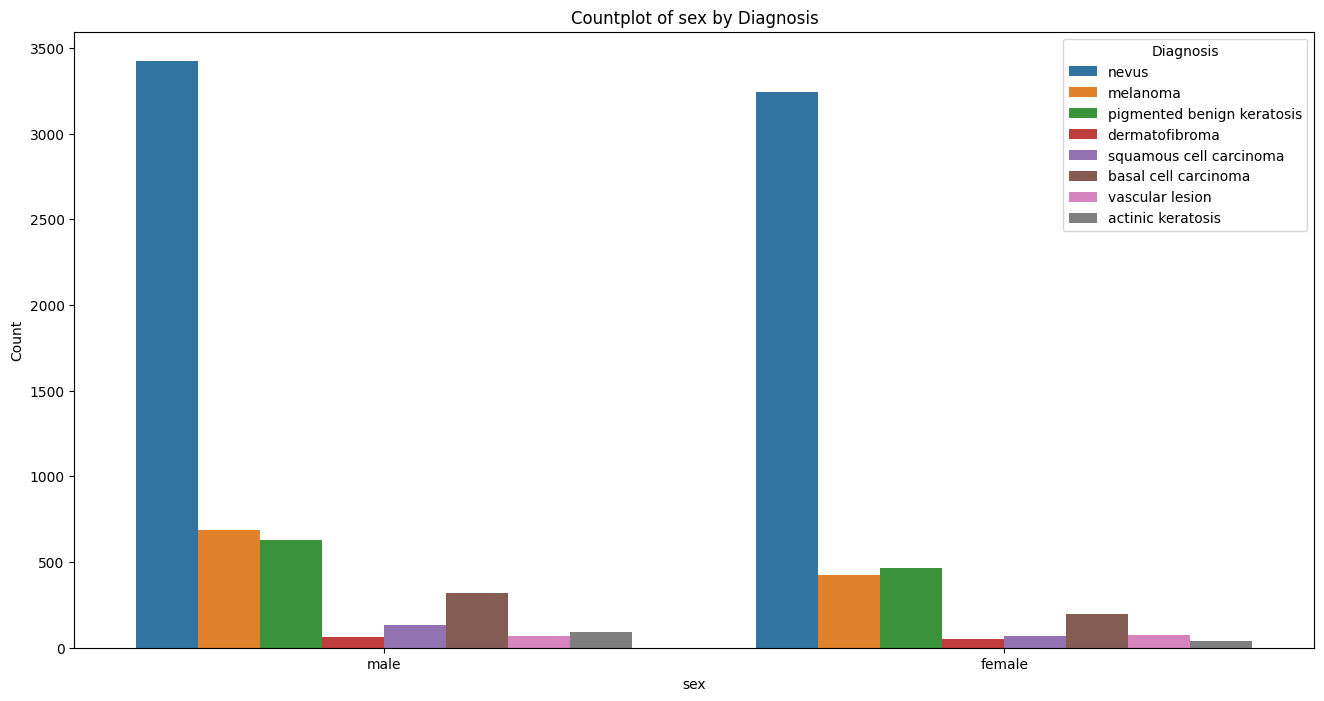

In [ ]:
# Loop through categorical columns
for cat_col in categorical_columns:
    # Countplot for Categorical Features across Diagnosis
    plt.figure(figsize=(16, 8))
    sns.countplot(x=cat_col, hue='diagnosis', data=skin_df)
    plt.title(f'Countplot of {cat_col} by Diagnosis')
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', loc='upper right')
    plt.show()


## Load Modules

In [ ]:
import tensorflow as tf  # TensorFlow is an open-source machine learning framework.
from tensorflow import keras  # Keras is a high-level neural networks API that runs on top of TensorFlow.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt  # Matplotlib is a plotting library for creating visualizations in Python.
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import backend as K

import cv2  # OpenCV is a computer vision library that provides tools for image processing.

import os  # The os module provides a way to interact with the operating system, e.g., for file and directory operations.
import pandas as pd
import numpy as np  # NumPy is a library for numerical operations in Python.

In [ ]:
# Load and preprocess images
def load_image(file_path):
    image = Image.open(file_path).resize((64, 64))  # Resize images if needed
    return image

In [ ]:
skin_df['image'] = skin_df['isic_id'].astype(str) + '.JPG'
skin_df['image'] = skin_df['image'].apply(lambda x: load_image(os.path.join('/content/images/Train', x)))


In [ ]:
skin_df.head()

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,image_type,lesion_id,melanocytic,sex,label,malignant,image
0,ISIC_0024306,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,45.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_7252831,True,male,4,0,<PIL.Image.Image image mode=RGB size=64x64 at ...
1,ISIC_0024307,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,50.0,lower extremity,benign,nevus,serial imaging showing no change,dermoscopic,IL_6125741,True,male,4,0,<PIL.Image.Image image mode=RGB size=64x64 at ...
2,ISIC_0024308,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,55.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_3692653,True,female,4,0,<PIL.Image.Image image mode=RGB size=64x64 at ...
3,ISIC_0024309,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,40.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_0959663,True,male,4,0,<PIL.Image.Image image mode=RGB size=64x64 at ...
4,ISIC_0024310,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,60.0,anterior torso,malignant,melanoma,histopathology,dermoscopic,IL_8194852,True,male,3,1,<PIL.Image.Image image mode=RGB size=64x64 at ...


In [ ]:
# Assuming you want to convert the images to numpy arrays
skin_df['image_array'] = skin_df['image'].apply(lambda x: np.asarray(x))
# Convert images to numpy arrays

In [ ]:
skin_df.head(1)

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,image_type,lesion_id,melanocytic,sex,label,malignant,image,image_array
0,ISIC_0024306,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,45.0,NaN,benign,nevus,serial imaging showing no change,dermoscopic,IL_7252831,True,male,4,0,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[229, 131, 134], [230, 127, 131], [230, 125,..."


In [ ]:
skin_df['image_array']

0        [[[229, 131, 134], [230, 127, 131], [230, 125,...
1        [[[216, 120, 134], [217, 124, 139], [219, 123,...
2        [[[248, 173, 180], [245, 171, 178], [246, 173,...
3        [[[208, 118, 133], [211, 120, 134], [207, 116,...
4        [[[69, 32, 39], [69, 31, 39], [63, 26, 30], [9...
                               ...                        
10010    [[[69, 41, 45], [83, 50, 52], [97, 61, 62], [1...
10011    [[[210, 200, 201], [214, 204, 205], [219, 209,...
10012    [[[160, 147, 167], [161, 147, 167], [162, 147,...
10013    [[[83, 58, 61], [92, 67, 70], [99, 70, 66], [1...
10014    [[[193, 173, 190], [198, 183, 199], [198, 183,...
Name: image_array, Length: 10015, dtype: object

In [ ]:
# Checking the image size distribution
skin_df['image_array'].map(lambda x: x.shape).value_counts()


(64, 64, 3)    10015
Name: image_array, dtype: int64

Map the image array to display the images and grouping according to diagnosis

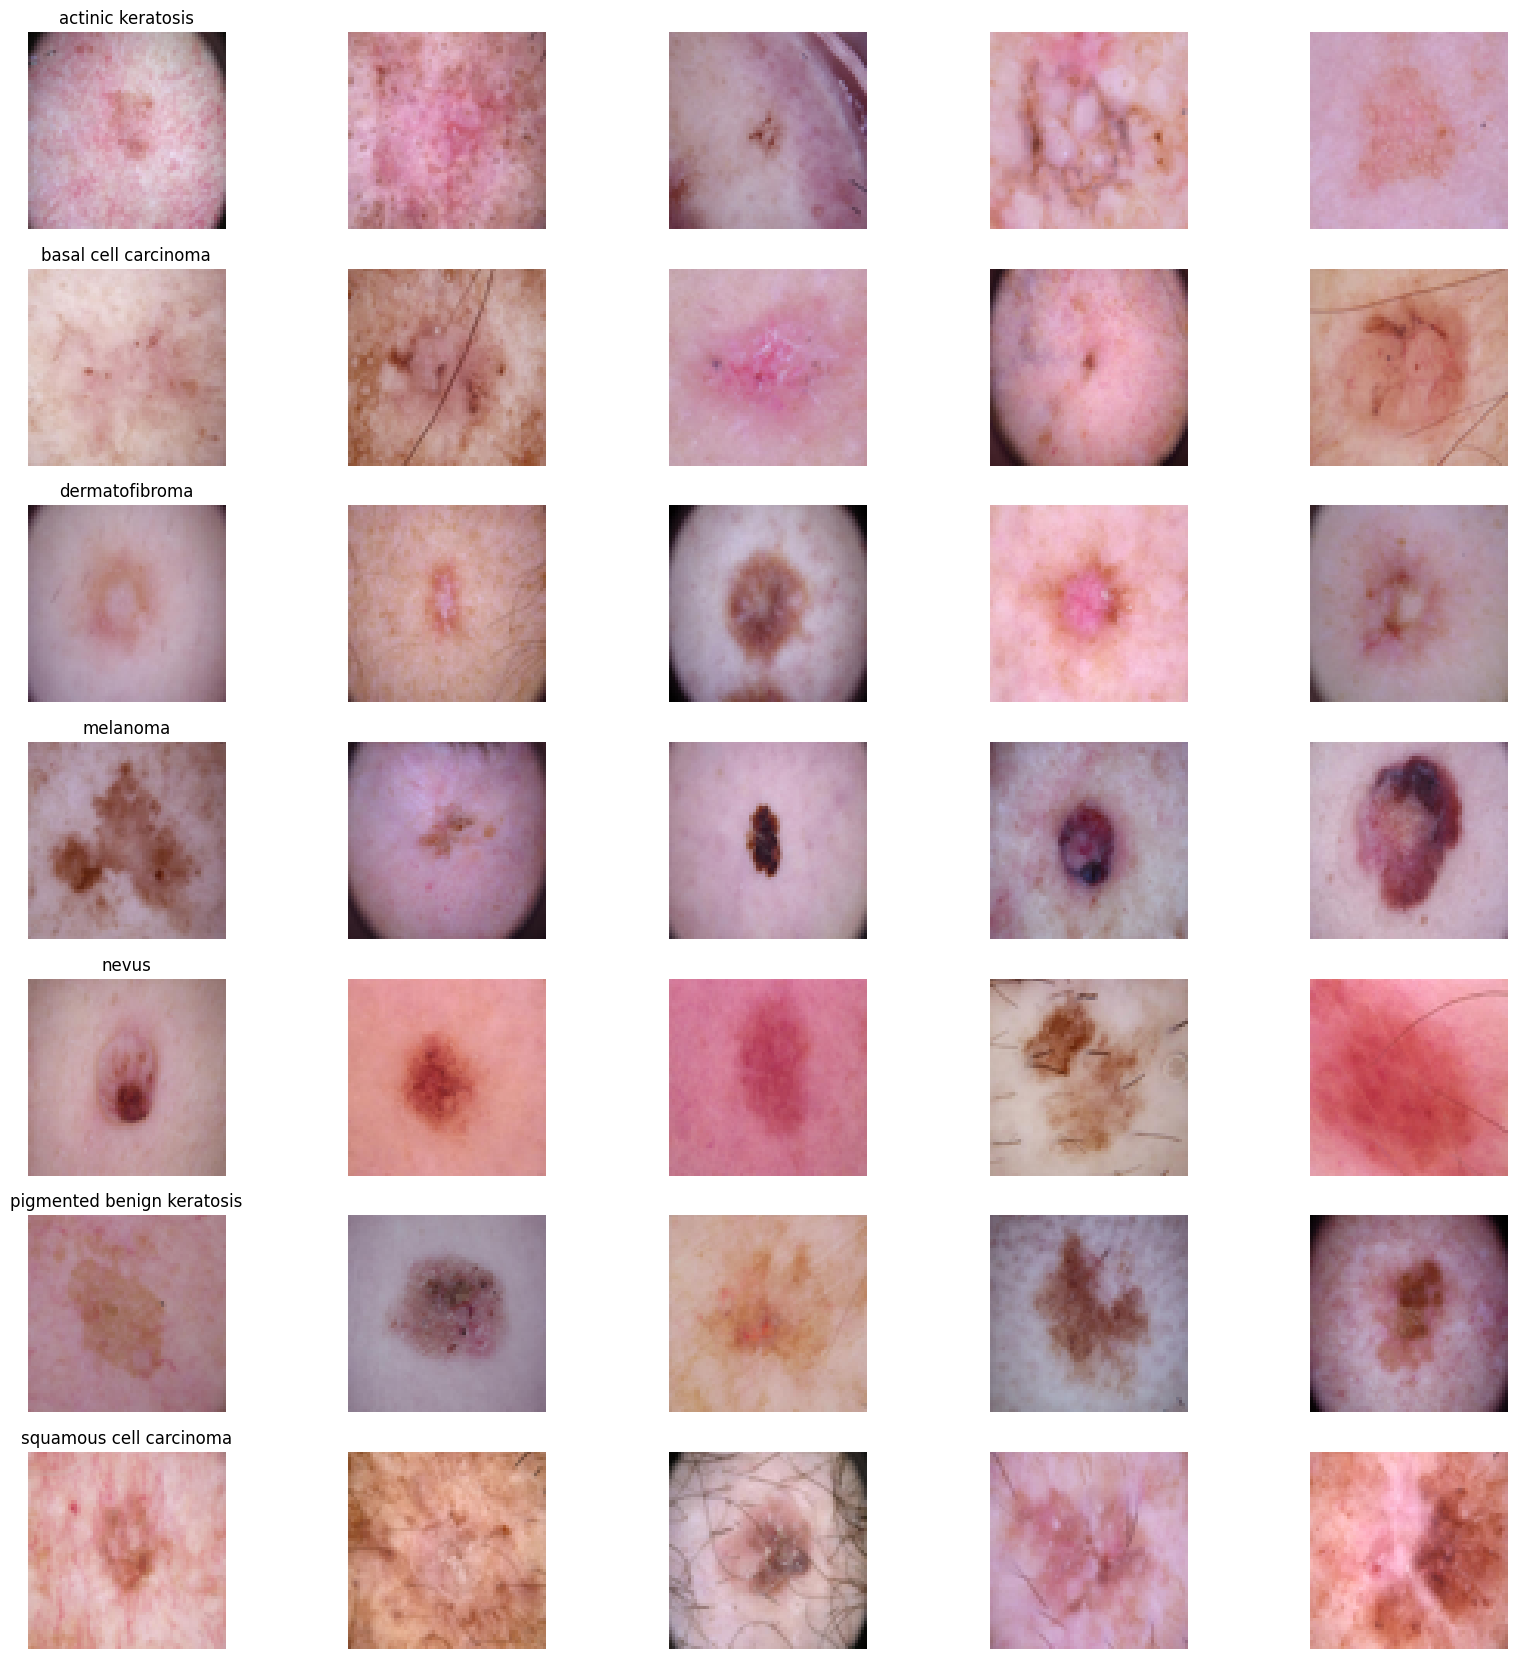

In [ ]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df.sort_values(['diagnosis']).groupby('diagnosis')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image_array'])
        c_ax.axis('off')

In [ ]:
X = np.asarray(skin_df['image_array'].tolist())

In [ ]:
X = X/255.

In [ ]:
X

array([[[[0.89803922, 0.51372549, 0.5254902 ],
         [0.90196078, 0.49803922, 0.51372549],
         [0.90196078, 0.49019608, 0.49803922],
         ...,
         [0.9254902 , 0.55686275, 0.58431373],
         [0.90196078, 0.54117647, 0.55686275],
         [0.88235294, 0.5254902 , 0.5254902 ]],

        [[0.90196078, 0.51764706, 0.52941176],
         [0.89803922, 0.49019608, 0.50980392],
         [0.90196078, 0.47843137, 0.49019608],
         ...,
         [0.91764706, 0.54901961, 0.58431373],
         [0.91764706, 0.55686275, 0.58431373],
         [0.90588235, 0.55294118, 0.55294118]],

        [[0.90588235, 0.51764706, 0.52941176],
         [0.89803922, 0.48235294, 0.50588235],
         [0.89803922, 0.47058824, 0.47843137],
         ...,
         [0.92156863, 0.55686275, 0.59215686],
         [0.91764706, 0.55686275, 0.58039216],
         [0.90588235, 0.55294118, 0.54901961]],

        ...,

        [[0.82352941, 0.46666667, 0.49019608],
         [0.81960784, 0.45882353, 0.48235294]

In [ ]:
y = skin_df['label']  #Assign label values to Y
y_cat = to_categorical(y, num_classes=8)

In [ ]:
y_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, random_state=42)

In [ ]:
#Image augmentation is a technique of applying different transformations to original images which results in multiple transformed
#copies of the same image. Each copy, however,
#is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
num_classes = 8  # Replace with the actual number of classes in your dataset

model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.3),
    Conv2D(64, (3, 3),activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       295040    
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 64)        73792     
                                                        

In [ ]:
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


In [ ]:

# Compile the model with sensitivity metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', sensitivity])

In [ ]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=10),
    validation_data=(X_test, y_test),
    epochs=50
)


Epoch 1/50
752/752 [==============================] - 29s 22ms/step - loss: 1.0814 - accuracy: 0.6689 - sensitivity: 0.5396 - val_loss: 1.0078 - val_accuracy: 0.6677 - val_sensitivity: 0.5451
Epoch 2/50
752/752 [==============================] - 16s 21ms/step - loss: 1.0224 - accuracy: 0.6693 - sensitivity: 0.5434 - val_loss: 0.9899 - val_accuracy: 0.6677 - val_sensitivity: 0.5285
Epoch 3/50
752/752 [==============================] - 16s 22ms/step - loss: 0.9976 - accuracy: 0.6696 - sensitivity: 0.5392 - val_loss: 1.0807 - val_accuracy: 0.6677 - val_sensitivity: 0.3972
Epoch 4/50
752/752 [==============================] - 15s 20ms/step - loss: 0.9861 - accuracy: 0.6684 - sensitivity: 0.5489 - val_loss: 0.9280 - val_accuracy: 0.6705 - val_sensitivity: 0.5938
Epoch 5/50
752/752 [==============================] - 15s 20ms/step - loss: 0.9572 - accuracy: 0.6700 - sensitivity: 0.5504 - val_loss: 0.9383 - val_accuracy: 0.6685 - val_sensitivity: 0.5752
Epoch 6/50
752/752 [====================

In [ ]:

# Evaluate the model
evaluation_results = model.evaluate(X_test, y_test)

# Unpack the evaluation results
test_loss = evaluation_results[0]
test_accuracy = evaluation_results[1]
print(f'Test accuracy: {test_accuracy}')

sen = evaluation_results[2]
print(f'Test sen: {sen}')

# Save the model
model.save('path/to/save/model.h5')

79/79 [==============================] - 1s 9ms/step - loss: 0.7578 - accuracy: 0.7256 - sensitivity: 0.6199
Test accuracy: 0.7256389856338501
Test sen: 0.6198576092720032


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
print(history.history['sensitivity'])

[0.5396278500556946, 0.5433512926101685, 0.5392287969589233, 0.5489363670349121, 0.5503995418548584, 0.5594416260719299, 0.5569151043891907, 0.5662238597869873, 0.5787239074707031, 0.5728727579116821, 0.5805856585502625, 0.5877663493156433, 0.583643913269043, 0.5914897918701172, 0.592288076877594, 0.5957454442977905, 0.5944154858589172, 0.5989363789558411, 0.602128267288208, 0.6051868796348572, 0.604388952255249, 0.6086443066596985, 0.6029261946678162, 0.604122519493103, 0.6074474453926086, 0.6047881245613098, 0.6047877073287964, 0.6159581542015076, 0.6111709475517273, 0.6214104294776917, 0.6162243485450745, 0.6168889403343201, 0.6206122636795044, 0.6175537109375, 0.6219422221183777, 0.624601423740387, 0.6320481300354004, 0.6218093037605286, 0.6251336932182312, 0.6300535798072815, 0.6293886303901672, 0.6373677849769592, 0.6337772607803345, 0.6292558908462524, 0.6385644674301147, 0.6304525136947632, 0.638564944267273, 0.6324476003646851, 0.6353731155395508, 0.6368356347084045]


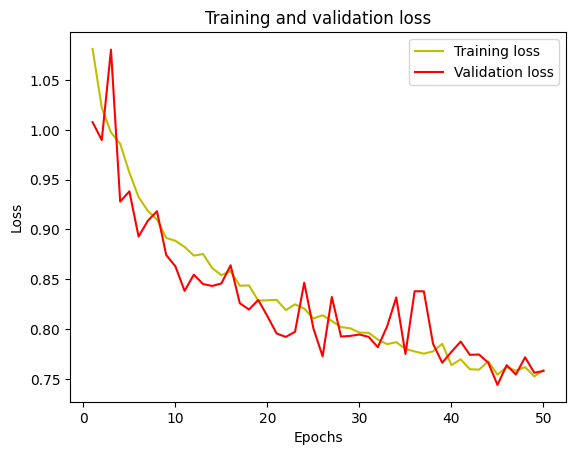

In [ ]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


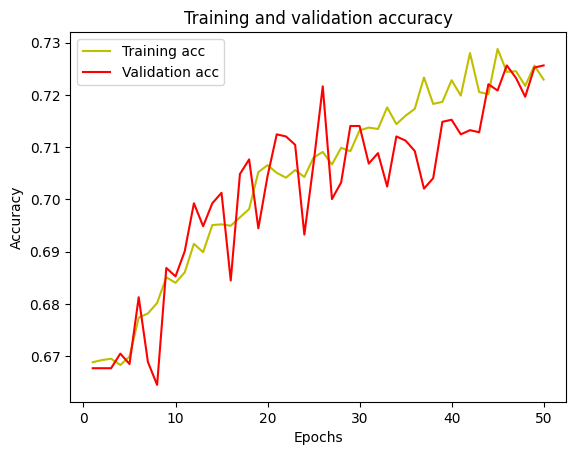

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
